<a href="https://colab.research.google.com/github/looloo404/Object_Detection/blob/master/SSD_tf_hub_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Tensorflow hub를 사용해서 Single Shot detector inference 수

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.12.0


In [3]:
!nvidia-smi

Fri Jul 28 18:16:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2023-07-28 18:16:10--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.04s   

2023-07-28 18:16:11 (9.13 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



In [5]:
# https://tfhub.dev의 모델을 url로 가져옴

model_url = 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2'
detector_model = hub.load(model_url)

In [7]:
import cv2
import numpy as np
import time

img_array_np =cv2.imread('/content/data/beatles01.jpg')

print(img_array_np.dtype)

start_time = time.time()

img_array = tf.expand_dims(img_array_np, axis = 0)

img_array = tf.cast(img_array, dtype = 'uint8')

result = detector_model(img_array)
#(num_img , h,w, width)

print('Elapsed_time : ', time.time() - start_time)

uint8
Elapsed_time :  0.03543901443481445


In [8]:
print(np.newaxis)

None


In [9]:
# inference 결과 출력
print(result)

{'raw_detection_scores': <tf.Tensor: shape=(1, 1917, 91), dtype=float32, numpy=
array([[[0.00249346, 0.01370233, 0.00740916, ..., 0.00415543,
         0.003356  , 0.00661684],
        [0.00249354, 0.0047312 , 0.00341557, ..., 0.00218212,
         0.00290628, 0.00123382],
        [0.00249336, 0.0037174 , 0.00301272, ..., 0.00119161,
         0.00268269, 0.00110499],
        ...,
        [0.00920269, 0.03282562, 0.01524714, ..., 0.01217233,
         0.00927732, 0.01237864],
        [0.00920281, 0.03090179, 0.01172539, ..., 0.01085665,
         0.0098613 , 0.01220303],
        [0.00920379, 0.11744448, 0.02195994, ..., 0.01482105,
         0.01279016, 0.01489438]]], dtype=float32)>, 'detection_anchor_indices': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[1475.,  435., 1453.,  432.,  369., 1465.,  372.,  420.,  366.,
         470.,  429.,  441.,  477., 1487.,  447.,  444.,  438.,  375.,
         477.,  501.,  450.,  435.,  617.,  477.,  593.,  423.,  363.,
         378.,  605.,

In [29]:
# 결과들의 result shape 확인
print(result.keys())
print('raw_detection_scores : ',result['detection_boxes'].shape)
print('detection_classes : ',result['detection_classes'].shape)
print('num_detections : ',result['num_detections'].shape)
print('detection_boxes : ',result['detection_boxes'].shape)
print('raw_detection_boxes : ', result['raw_detection_boxes'].shape)
print('detection_scores : ', result['detection_scores'].shape)

dict_keys(['raw_detection_scores', 'detection_anchor_indices', 'detection_classes', 'num_detections', 'detection_boxes', 'raw_detection_boxes', 'detection_scores', 'detection_multiclass_scores'])
raw_detection_scores :  (1, 100, 4)
detection_classes :  (1, 100)
num_detections :  (1,)
detection_boxes :  (1, 100, 4)
raw_detection_boxes :  (1, 1917, 4)
detection_scores :  (1, 100)


In [30]:
print(result['detection_classes'])

tf.Tensor(
[[ 1.  3.  1.  3.  3.  1.  3.  3.  3.  3.  3.  3.  1.  1.  3.  3.  3.  3.
   3.  1.  3.  8.  1.  4.  1.  3.  3.  3.  1.  1.  1.  1.  3.  1.  1.  1.
   1.  2.  1.  1. 41. 15. 15.  9.  1.  3.  3.  1.  1. 15.  4.  1.  1. 15.
   1. 28. 37.  8.  1.  3.  4. 10.  3.  8.  1.  1.  3.  1.  1. 31.  9.  3.
   1.  1.  8.  3.  1.  3.  1. 31. 15.  1. 31.  3.  1.  1.  3.  1.  1. 37.
   4. 10. 31. 31.  3.  1.  1.  8.  1. 34.]], shape=(1, 100), dtype=float32)


In [31]:
# detect된 object들은 detection score가 높은 순으로 array값을 순차적으로 채움.
print('#### detection_classes #####')
print(result['detection_classes'])
print('#### detection_scores #####')
print(result['detection_scores'])

#### detection_classes #####
tf.Tensor(
[[ 1.  3.  1.  3.  3.  1.  3.  3.  3.  3.  3.  3.  1.  1.  3.  3.  3.  3.
   3.  1.  3.  8.  1.  4.  1.  3.  3.  3.  1.  1.  1.  1.  3.  1.  1.  1.
   1.  2.  1.  1. 41. 15. 15.  9.  1.  3.  3.  1.  1. 15.  4.  1.  1. 15.
   1. 28. 37.  8.  1.  3.  4. 10.  3.  8.  1.  1.  3.  1.  1. 31.  9.  3.
   1.  1.  8.  3.  1.  3.  1. 31. 15.  1. 31.  3.  1.  1.  3.  1.  1. 37.
   4. 10. 31. 31.  3.  1.  1.  8.  1. 34.]], shape=(1, 100), dtype=float32)
#### detection_scores #####
tf.Tensor(
[[0.80172926 0.7356189  0.71201724 0.694139   0.6636528  0.65565044
  0.6452405  0.60372716 0.6026706  0.5842153  0.56527376 0.5350406
  0.5342654  0.5268754  0.52053607 0.50956285 0.49782994 0.49455026
  0.49444327 0.48153725 0.4632209  0.4434899  0.43932414 0.43850386
  0.43563354 0.42940453 0.40469146 0.40248087 0.40042165 0.38804996
  0.37969714 0.3792313  0.3572933  0.35150272 0.3513088  0.34515956
  0.34445184 0.34312055 0.34093928 0.34077513 0.33898032 0.33623475


In [33]:
# 단 tf_hub에서는 ymin ymax xmin xmax 순서로 반환된다. => y가 먼저 x가 나중에 나온다.
# 좌표값은 0 ~ 1사이의 정규화 되어 있다.
print('### detection boxes ###')
print(result['detection_boxes'])

### detection boxes ###
tf.Tensor(
[[[0.41495633 0.4789079  0.8861095  0.6805986 ]
  [0.35446182 0.6193308  0.4560112  0.7103389 ]
  [0.42462415 0.07202514 0.8726056  0.24962679]
  [0.34840307 0.57042307 0.4265056  0.6450172 ]
  [0.351907   0.49550375 0.37206447 0.51862085]
  [0.43273562 0.2820462  0.8654354  0.45395404]
  [0.34878334 0.5463882  0.37784776 0.5763231 ]
  [0.37359872 0.38559082 0.41415027 0.42749032]
  [0.3549313  0.45743853 0.3715493  0.4719668 ]
  [0.3873283  0.16212597 0.5466345  0.31490028]
  [0.35574898 0.53846586 0.41043958 0.595577  ]
  [0.35995895 0.74961007 0.4518572  0.80073214]
  [0.41962266 0.37767807 0.49098235 0.41628668]
  [0.40850356 0.69716555 0.88816273 0.87542397]
  [0.37630147 0.8410377  0.4158867  0.88230294]
  [0.3869046  0.8088866  0.42234337 0.8531973 ]
  [0.35546145 0.66919553 0.45342818 0.7328212 ]
  [0.33963862 0.5889446  0.3827575  0.64008945]
  [0.41962266 0.37767807 0.49098235 0.41628668]
  [0.39901894 0.7998833  0.5149196  0.85316366]
  [0.

Inference 결과를 이미지로 시각화

In [36]:
# result 내의 value들을 모두 numpy로 변환
result = {key:value.numpy() for key,value in result.items()}

In [37]:
print(result)

{'raw_detection_scores': array([[[0.00249346, 0.01370233, 0.00740916, ..., 0.00415543,
         0.003356  , 0.00661684],
        [0.00249354, 0.0047312 , 0.00341557, ..., 0.00218212,
         0.00290628, 0.00123382],
        [0.00249336, 0.0037174 , 0.00301272, ..., 0.00119161,
         0.00268269, 0.00110499],
        ...,
        [0.00920269, 0.03282562, 0.01524714, ..., 0.01217233,
         0.00927732, 0.01237864],
        [0.00920281, 0.03090179, 0.01172539, ..., 0.01085665,
         0.0098613 , 0.01220303],
        [0.00920379, 0.11744448, 0.02195994, ..., 0.01482105,
         0.01279016, 0.01489438]]], dtype=float32), 'detection_anchor_indices': array([[1475.,  435., 1453.,  432.,  369., 1465.,  372.,  420.,  366.,
         470.,  429.,  441.,  477., 1487.,  447.,  444.,  438.,  375.,
         477.,  501.,  450.,  435.,  617.,  477.,  593.,  423.,  363.,
         378.,  605.,  578.,  441.,  366.,  453.,  489.,  438.,  462.,
        1457.,  477.,  363.,  420., 1015., 1575.,  420.,

In [38]:
# 1부터 91까지의 COCO Class id 매핑. 약 80여개의 object
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [39]:
def get_ssd_detector(model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"):
  detector = hub.load(model_url)
  return detector

detector_model = get_ssd_detector()

person: 0.776728
person: 0.736242
car: 0.720884
person: 0.708351
car: 0.686839
person: 0.684615
car: 0.665236
car: 0.614541
car: 0.585394
car: 0.572373
car: 0.560582
car: 0.534111
person: 0.522809


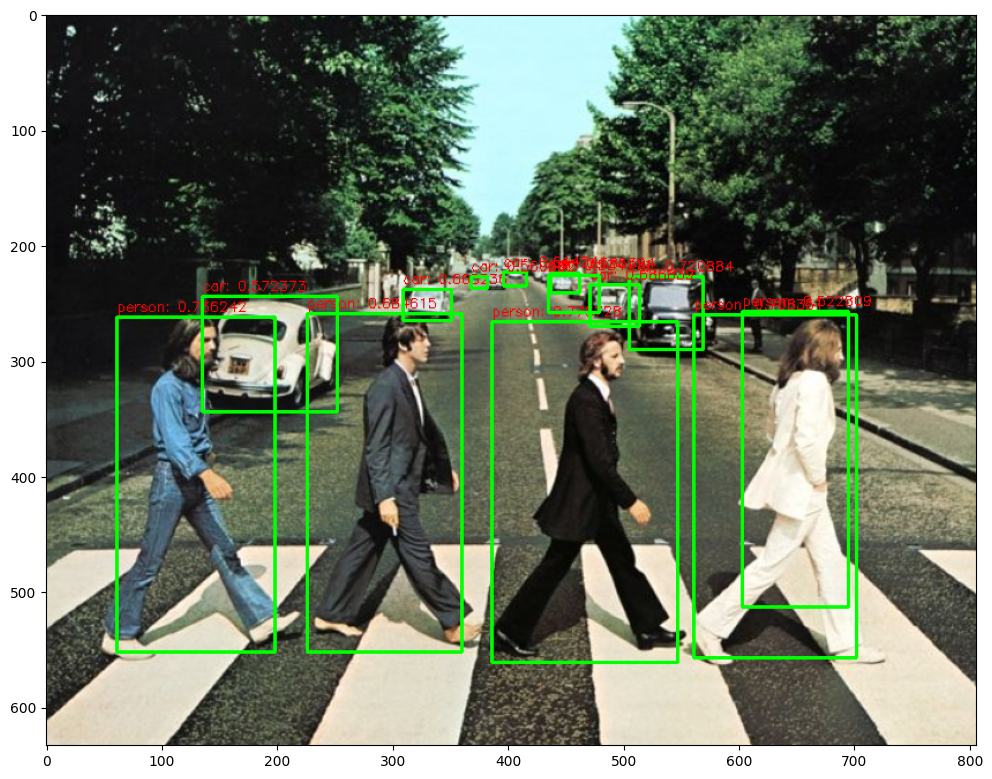

In [61]:
import cv2

img_array = cv2.cvtColor(cv2.imread('./data/beatles01.jpg'),cv2.COLOR_BGR2RGB)

# 정규화를 원래대로 돌리기 위해서는 이미지의 width height가 필요
height, width= img_array.shape[:2]
# print(height, width)

draw_img = img_array.copy()

#bounding box의 color 설정 opencv => bgr
green = (0,255,0)
red = (255,0,0)

img_tensor = tf.expand_dims(img_array, axis = 0)
# print(img_tensor.shape)

result = detector_model(img_tensor)

SCORES_THRESHOLD = 0.5
OBJECT_DEFAULT_COUNT = 100
# print(result['detection_scores'])

for i in range(min(result['detection_scores'][0].shape[0], OBJECT_DEFAULT_COUNT)):
  score = result['detection_scores'][0,i]
  if score <= SCORES_THRESHOLD :
    break

  #detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
  box = result['detection_boxes'][0, i]

  # ymin xmin ymax xmax 순서
  left = box[1]*width
  top = box[0]*height
  right = box[3]*width
  bottom = box[2]*height

  class_id = int(result['detection_classes'][0,i])
  caption = "{}: {:4f}".format(labels_to_names[class_id], score)
  print(caption)

  cv2.rectangle(draw_img,(int(left),int(top)), (int(right),int(bottom)), color = green, thickness = 2)
  cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red, 1)

plt.figure(figsize = (12,12))
plt.imshow(draw_img)

In [64]:
#위에 코드를 함수화

import time

def get_detected_img(model, img_array, score_threshold, object_show_count=100, is_print=True):
  # scaling된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
  height = img_array.shape[0]
  width = img_array.shape[1]
  # cv2의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 하므로 그림 표현을 위한 별도의 이미지 배열 생성.
  draw_img = img_array.copy()

  # bounding box의 테두리와 caption 글자색 지정
  green_color=(0, 255, 0)
  red_color=(255, 0, 0)

  # cv2로 만들어진 numpy image array를 tensor로 변환
  img_tensor = tf.convert_to_tensor(img_array, dtype=tf.uint8)[tf.newaxis, ...]
  #img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)[tf.newaxis, ...]

  # ssd+mobilenet v2 모델을 다운로드 한 뒤 inference 수행.
  start_time = time.time()
  result = model(img_tensor)
  # result 내부의 value를 numpy 로 변환.
  result = {key:value.numpy() for key,value in result.items()}

  # detected 된 object들을 iteration 하면서 정보 추출. detect된 object의 갯수는 100개
  for i in range(min(result['detection_scores'][0].shape[0], object_show_count)):
    # detection score를 iteration시 마다 높은 순으로 추출하고 SCORE_THRESHOLD보다 낮으면 loop 중단.
    score = result['detection_scores'][0, i]
    if score < score_threshold:
      break
    # detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
    box = result['detection_boxes'][0, i]

    ''' **** 주의 ******
    box는 ymin, xmin, ymax, xmax 순서로 되어 있음. '''
    left = box[1] * width
    top = box[0] * height
    right = box[3] * width
    bottom = box[2] * height

    # class id 추출하고 class 명으로 매핑
    class_id = result['detection_classes'][0, i]
    caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
    print(caption)
    #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
    cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
    cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

  if is_print:
    print('Detection 수행시간:',round(time.time() - start_time, 2),"초")

  return draw_img

person: 0.7767
person: 0.7362
car: 0.7209
person: 0.7084
car: 0.6868
person: 0.6846
car: 0.6652
car: 0.6145
car: 0.5854
car: 0.5724
car: 0.5606
car: 0.5341
person: 0.5228
Detection 수행시간: 0.05 초


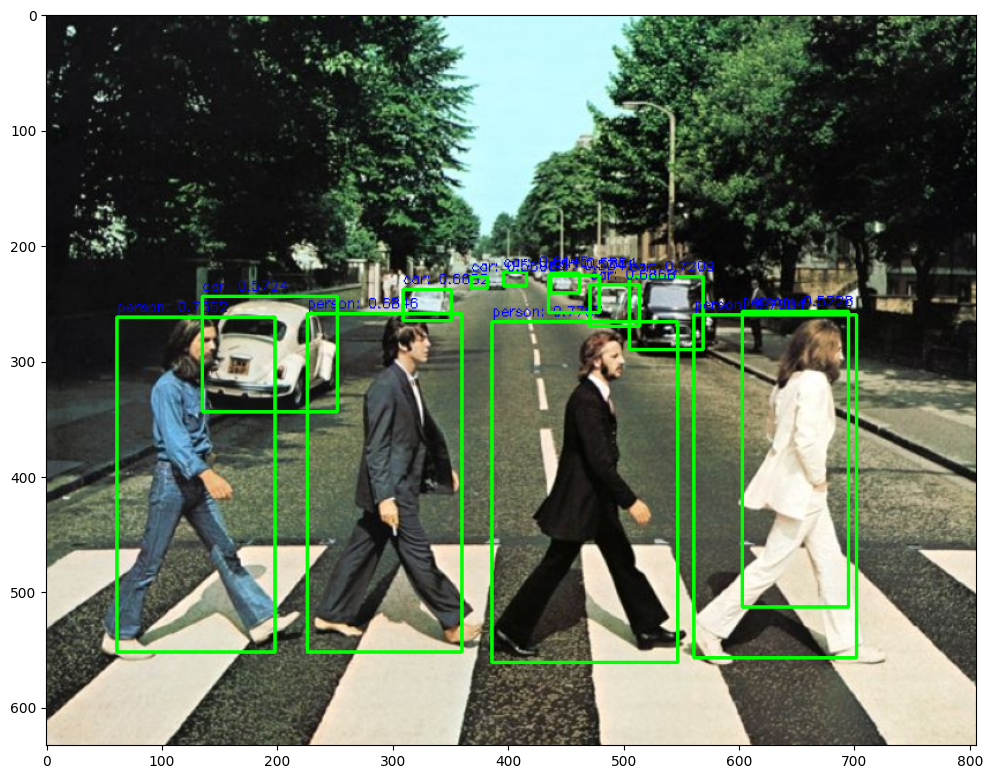

In [63]:
#detector_model = get_ssd_detector()

img_array = cv2.cvtColor(cv2.imread('/content/data/beatles01.jpg'), cv2.COLOR_BGR2RGB)
draw_img = get_detected_img(detector_model, img_array, score_threshold=0.5, object_show_count=100, is_print=True)

plt.figure(figsize=(12, 12))
plt.imshow(draw_img)

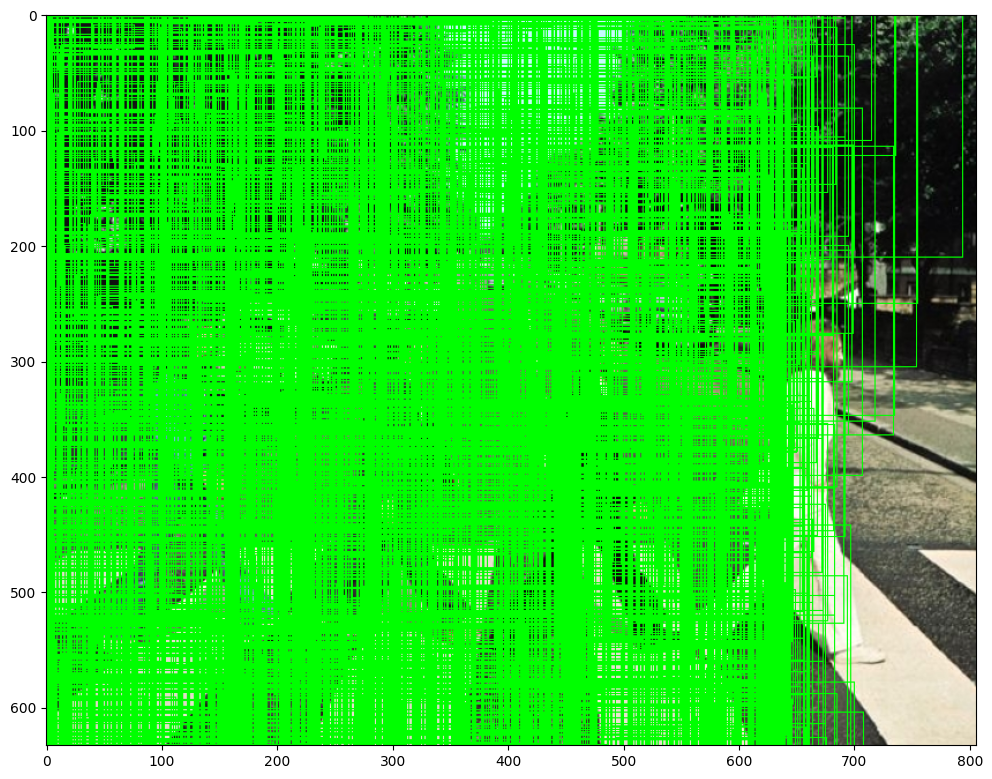

In [74]:

#row_detection_boxes 시각
img_array = cv2.cvtColor(cv2.imread('/content/data/beatles01.jpg'), cv2.COLOR_BGR2RGB)
draw_img = img_array.copy()
width, height = img_array.shape[:2]

#bounding box의 color 설정 opencv => bgr
green = (0,255,0)
red = (255,0,0)

for i in range(result['raw_detection_boxes'].shape[1]):
  box = result['raw_detection_boxes'][0][i]
  left = box[1] * width
  top = box[0] * height
  right = box[3] * width
  bottom = box[2] * height
  cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green, thickness=1)

plt.figure(figsize = (12,12))
plt.imshow(draw_img)


In [65]:
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

--2023-07-28 21:31:14--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.02s   

2023-07-28 21:31:14 (4.64 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]



person: 0.8886
person: 0.8754
person: 0.8638
baseball bat: 0.5842
baseball glove: 0.5645
baseball glove: 0.5182
baseball bat: 0.5007
Detection 수행시간: 0.04 초


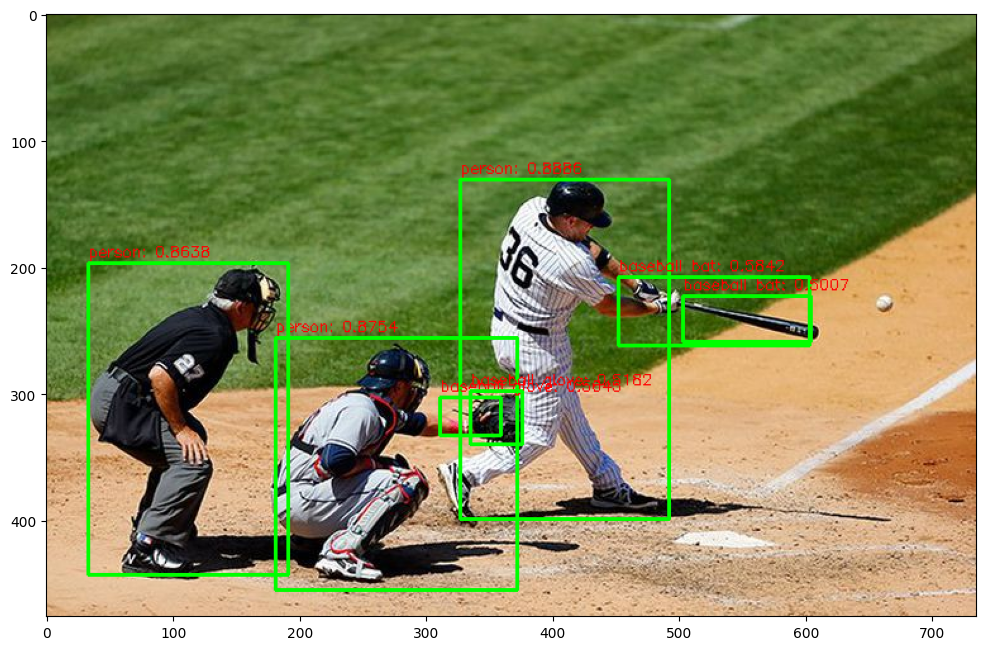

In [66]:
img_array = cv2.cvtColor(cv2.imread('/content/data/baseball01.jpg'), cv2.COLOR_BGR2RGB)
draw_img = get_detected_img(detector_model, img_array, score_threshold=0.5, object_show_count=100, is_print=True)

plt.figure(figsize=(12, 12))
plt.imshow(draw_img)